<a href="https://colab.research.google.com/github/vak1997/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Zomato Restaurant Clustering and Sentiment Analysis**




##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 - Arun Kumar V**


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

 

# **GitHub Link -**

https://github.com/vak1997/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/


# **Problem Statement**


The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
#reading restaurent names and metadata as rest_df
rest_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv')

#reading restaurent reviews data as reviews_df
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv')


### Dataset First View

In [5]:
# Dataset First Look
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
#first five rows of reviews dataset
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
rest_df.shape

(105, 6)

In [8]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [9]:
# Dataset Info
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


We have 105 rows and 6 columns . with two columns having null values

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


We have 10000 rows and 7 columns

The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done.

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
rest_df[rest_df.duplicated()].shape[0]

0

No Duplicates in restaurent data

In [12]:
reviews_df[reviews_df.duplicated()].shape[0]

36

We have around 36 duplicate rows which have to be removed

In [13]:
#dropping duplicates from revoews data
reviews_df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
rest_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [15]:
# Visualizing the missing values
rest_df[rest_df.Collections.isna()]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


Around 50% of the data is missing in the categorical column "Collections", which are basically just tags given by zomato for better search results.

Even when imputed with various categorical data imputing measures, it would be pretty difficult to match similar tags as the restaurants and then even more difficult to then convert them into a meaningful numerical feature afterward. If the information contained in the variable is not that high, it is better to drop the variable if it has 50% or more missing values.

In [16]:
#drop collections
rest_df.drop('Collections', axis=1, inplace=True)

In [17]:
#Impute one missing timing row with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [18]:
#checking of nulls
rest_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [19]:
# Missing Values/Null Values Count
reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [20]:
# Visualizing the missing values
reviews_df[reviews_df.Review.isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


It can also be seen that some of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time.

So we can drop this null rows, to make analysis more clear.

In [21]:
#dropping null rows in reviews first
reviews_df.dropna(subset = ["Review"], inplace=True)

In [22]:
#checking of nulls
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
rest_df.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [24]:
# Dataset Describe
rest_df.describe()

,Name,Links,Cost,Cuisines,Timings
count,105,105,105,105,105
unique,105,105,29,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,7


Cost have to be in number format, but duw to comma it is taking as string we need to change it

In [25]:
# changing cost datatype
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

In [26]:
#checking dtypes
reviews_df.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [27]:
#Data Set Describe
reviews_df.describe()

,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [28]:
#rating is in object type
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

like should not be here, It will affect our analysis

In [29]:
reviews_df.groupby(['Rating']).Reviewer.nunique()

Rating
1       1642
1.5        9
2        648
2.5       19
3       1019
3.5       47
4       1865
4.5       69
5       3407
Like       1
Name: Reviewer, dtype: int64

The Like have only one review is an outlier, so we can fille it simply with max Rating

In [30]:
# correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','5')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

## 3. ***Data Wrangling***

### Data Wrangling Code

**Zomato Restaurant names and Metadata**

First, the restaurants dataset has columns such as Links, Cuisine, and Timings which aren't directly interpretable. The location of the restaurant can be extracted by the Links column. Cuisines can be clubbed and categorized into a few categories and a total number of cuisines served by a particular restaurant. Timings can be categorized into three categories to make analysis a little simpler.

In [31]:
# Write your code to make your dataset analysis ready.
rest_df['Links']

0      https://www.zomato.com/hyderabad/beyond-flavou...
1      https://www.zomato.com/hyderabad/paradise-gach...
2      https://www.zomato.com/hyderabad/flechazo-gach...
3      https://www.zomato.com/hyderabad/shah-ghouse-h...
4      https://www.zomato.com/hyderabad/over-the-moon...
                             ...                        
100    https://www.zomato.com/hyderabad/indiblaze-gac...
101    https://www.zomato.com/hyderabad/sweet-basket-...
102    https://www.zomato.com/hyderabad/angaara-count...
103    https://www.zomato.com/hyderabad/wich-please-1...
104    https://www.zomato.com/hyderabad/republic-of-n...
Name: Links, Length: 105, dtype: object

In [32]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
rest_df['Location'] = rest_df['Links'].apply(location)

In [33]:
# looks like the dataset consists of the restaurants in Hyderabad
rest_df.groupby(['Location']).Name.nunique()

Location
hyderabad             104
thetiltbarrepublic      1
Name: Name, dtype: int64

From this we come to know all Location of Restaurent is **Hyderbad**, so this column wont be much useful for analysis

In [34]:
#dropping unnecessary columns
rest_df.drop(['Links','Location'],axis=1,inplace=True)

In [35]:
reviews_df.Time

0       5/25/2019 15:54
1       5/25/2019 14:20
2       5/24/2019 22:54
3       5/24/2019 22:11
4       5/24/2019 21:37
             ...       
9995      6/5/2016 0:08
9996     6/4/2016 22:01
9997     6/3/2016 10:37
9998    5/31/2016 17:22
9999    5/31/2016 16:41
Name: Time, Length: 9955, dtype: object

The time of Reviewe is not much important for sentiment analysis so we can remove it

In [36]:
#let's drop time as it would not be required
reviews_df.drop(['Time'],axis=1,inplace=True)

### **Cuisines**

Here, it can be seen that the various cuisines served by every restaurant are in the form of strings and it's important to categorize and create dummy variables for all the cuisines served. The procedure followed in doing this is as follows:

First, strings are split to get the cuisines in the list datatype.

A frequency dictionary is created to understand the unique cuisines and the frequency in which the cuisine occurs.

An attempt is made to the club and categoriz various misspelled cuisines and get a minimized number of unique cuisines.

Next, we need these cuisines in the one-hot encoded form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [37]:
#splitting to create list instead of strings
rest_df['Cuisines'] = rest_df['Cuisines'].apply(lambda x : x.split(','))

In [38]:
#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for idx in rest_df.index:
  cuisine_list.append(rest_df['Cuisines'][idx])

In [39]:
#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [40]:
#frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

In [41]:
#frequency dictionary
frequency_dict

{'Chinese': 7,
 ' Continental': 17,
 ' Kebab': 5,
 ' European': 2,
 ' South Indian': 7,
 ' North Indian': 28,
 'Biryani': 4,
 ' Chinese': 36,
 'Asian': 5,
 ' Mediterranean': 4,
 ' Desserts': 11,
 ' Seafood': 3,
 ' Beverages': 5,
 'Seafood': 1,
 ' Goan': 1,
 ' Asian': 10,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 4,
 'Ice Cream': 2,
 'Street Food': 2,
 ' Fast Food': 10,
 'Mediterranean': 1,
 ' BBQ': 1,
 'Continental': 4,
 ' American': 2,
 'North Indian': 33,
 ' Italian': 12,
 ' Finger Food': 1,
 'European': 2,
 'Burger': 2,
 ' Biryani': 12,
 ' Japanese': 2,
 ' Salad': 5,
 ' Sushi': 4,
 'Mexican': 1,
 'Mughlai': 1,
 'Fast Food': 5,
 'Andhra': 3,
 'Bakery': 6,
 ' Mughlai': 5,
 ' Juices': 1,
 'Arabian': 1,
 'Italian': 2,
 ' Andhra': 3,
 ' Hyderabadi': 3,
 'Cafe': 5,
 ' Spanish': 1,
 ' Wraps': 1,
 'Finger Food': 1,
 ' Thai': 2,
 ' Indonesian': 1,
 'South Indian': 2,
 ' Bakery': 1,
 'Modern Indian': 1,
 'Desserts': 2,
 'Kebab': 1,
 ' Momos': 3,
 'BBQ': 1,
 ' Modern Indian': 1,
 ' Burg

It is observable that many of the cuisines are misspelled in terms of an extra space added at the beginning of the string. For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.

Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.

In [42]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [43]:
# just in case 
names_df = rest_df.copy()

In [44]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list1.append(key)
      
  return list(set(list1)) # returns a unique cuisines list

In [45]:
#correcting and getting the desired lists as row values for cuisines column
names_df['Cuisines'] = names_df['Cuisines'].apply(cuisine_corrector)

In [46]:
#check
names_df.head(3)

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"[Mughlai, Chinese, South Indian, European, Nor...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"[North Indian, Chinese, Hyderabadi]",11 AM to 11 PM
2,Flechazo,1300,"[North Indian, Mediterranean, Desserts, Asian]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


In [47]:
# concatenate new columns with the dataset
names_df = pd.concat([names_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [48]:
# iterating for every row in the dataframe
for i, row in names_df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(names_df.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          names_df.loc[i,column] = 1
        else:
          names_df.loc[i,column] = 0

In [49]:
#let's check
names_df.head(2)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,"[Mughlai, Chinese, South Indian, European, Nor...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,Paradise,800.0,"[North Indian, Chinese, Hyderabadi]",11 AM to 11 PM,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# value for 1st restaurant and verifying 
names_df.loc[0,'Cuisines']

['Mughlai',
 'Chinese',
 'South Indian',
 'European',
 'North Indian',
 'Continental']

In [51]:
#creating a new column for the total number of cusines served by restaurants
names_df['Total Cuisines'] = names_df['Cuisines'].apply(lambda x : len(x))

In [52]:
#check
names_df.head(1)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800.0,"[Mughlai, Chinese, South Indian, European, Nor...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,6


In [53]:
#drop cuisines column
names_df.drop(['Cuisines'],axis=1,inplace=True)

In [54]:
#analyse the unique values in Timings
names_df['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [55]:
#drop timings
names_df.drop(['Timings'],axis=1,inplace=True)

Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.

In [56]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head(10)

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


In [57]:
#adding an average rating feature in restaurant names and metadata dataframe
names_df = names_df.merge(restaurant_ratings,on='Name',how='left')
names_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_df.head(5)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28
1,Paradise,800.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,4.66
3,Shah Ghouse Hotel & Restaurant,800.0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,5,3.21
4,Over The Moon Brew Company,1200.0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,4.34


In [58]:
# info on the final dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [59]:
#five restaurants have not been rated by people yet
names_df['Avg Rating'].fillna(0,inplace=True)

## **Zomato Restaurant Reviews**

In [60]:
#head
reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [61]:
#splitting meta data into reviews and followers seperately

reviews_df['Reviews'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])


In [62]:
#drop Metadata
reviews_df.drop(['Metadata'],axis=1,inplace=True)

In [63]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Exploratory Data Analysis**

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

Best restaurants in the city

The Most Popular Cuisines in Hyderabad

Restaurants and their Costs

Cost-Benefit Analysis

Hypotheses Generation on visualized data for Clustering



#### Chart - 1

In [64]:
# sorting out the best restaurants
best_restaurants = names_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

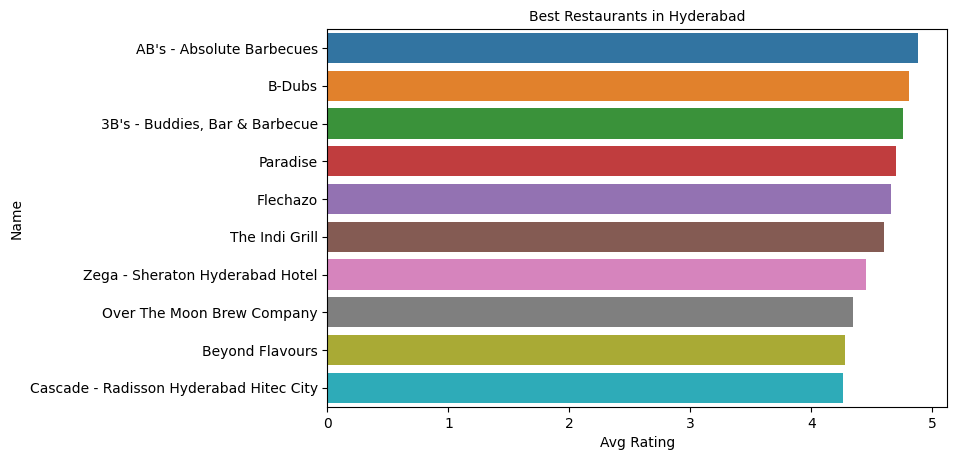

In [65]:
# Chart - 2 visualization code
#visualizing the best restaurants 
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

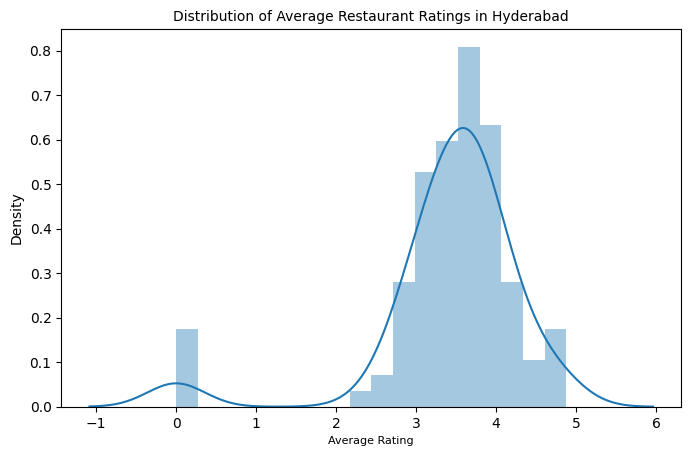

In [66]:
# Chart - 3 visualization code
#distribution of Average Ratings in Hyderabad
sns.distplot(x=names_df['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

Few restaurants in the original restaurant dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4. Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### The Most Popular Cuisines in Hyderabad**

In [113]:

#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [names_df[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
popular_cuisines

,Cuisines,Total Restaurants
0,North Indian,64
1,Chinese,45
2,Continental,39
3,Hyderabadi,18
4,Fast Food,17
5,Italian,15
6,Asian,15
7,Desserts,14
8,Mughlai,13
9,South Indian,9


Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

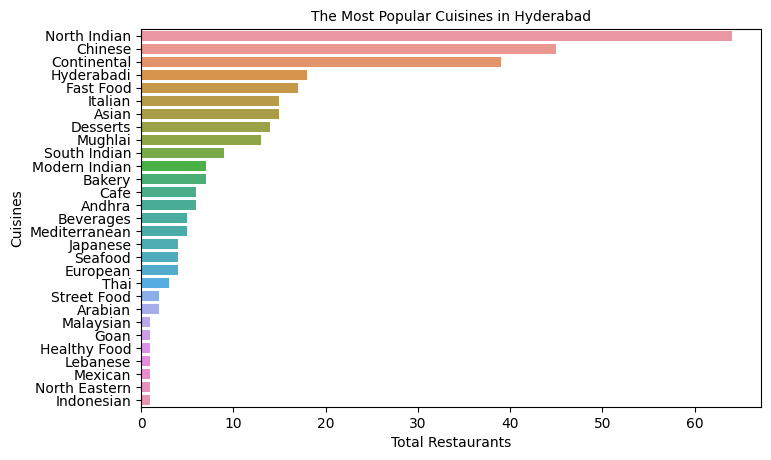

In [114]:
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=10)

Although located in South India, North Indian food is dominating in the restaurants followed by Chinese, and Continental. The number of cuisines shows the diverse food options available in Hyderabad.

#### Restaurants and their Costs

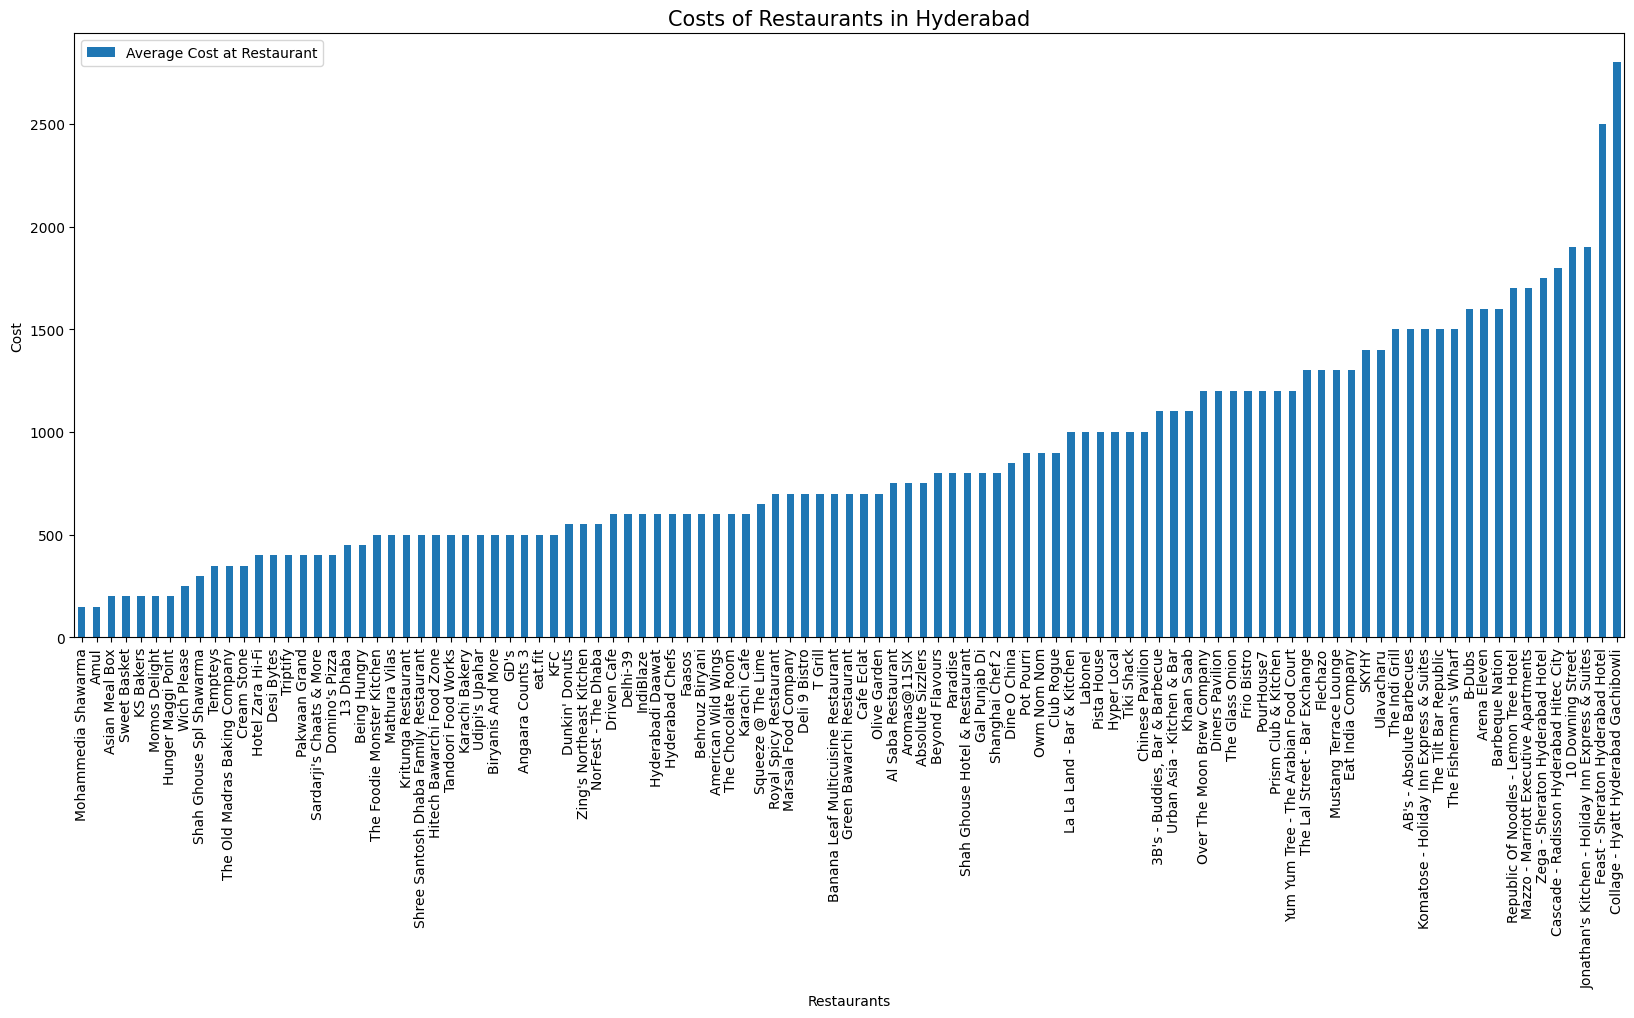

In [115]:
# visualizing Restaurant Costs
names_df.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [69]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [70]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [71]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [72]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [73]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [74]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [75]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [76]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [77]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [78]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [79]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [81]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [82]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [83]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [84]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [85]:
# Expand Contraction

#### 2. Lower Casing

In [86]:
# Lower Casing

#### 3. Removing Punctuations

In [87]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [88]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [89]:
# Remove Stopwords

In [90]:
# Remove White spaces

#### 6. Rephrase Text

In [91]:
# Rephrase Text

#### 7. Tokenization

In [92]:
# Tokenization

#### 8. Text Normalization

In [93]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [94]:
# POS Taging

#### 10. Text Vectorization

In [95]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [96]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [97]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [98]:
# Transform Your data

### 6. Data Scaling

In [99]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [100]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [101]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [102]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [103]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [104]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [106]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [107]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [108]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [109]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [111]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [112]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***